# **Playstore app market insights**

## **Introduction**

This project is based on a dataset of more than two million applications from the **Google Play Store**.  
The dataset includes app information such as category, ratings, installs, price, free/paid status, in-app purchases, and Play Store recommendations.  

This dataset is particularly relevant to **Xpertbot**, an educational app, since it allows us to explore how **Education apps** perform within the wider app market.  
By analyzing this dataset, we can gain insights into:

-  The distribution of apps across categories and the position of Education apps.  
-  The quality of apps (ratings, installs, user engagement).  
-  Monetization strategies (free vs paid, in-app purchases).  
-  The effect of Play Store recommendations on visibility and success.
-  
This combination of **overall market analysis**, **deep dive into Education apps**, and **comparisons with other categories** can help Xpertbot better understand its competitive environment and user preferences.

*Dataset Source : Kaggle.com*




In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv(r"C:\Users\A\Desktop\playstore_app_market_insights\Database\Google-Playstore.csv")

## **Dataset Overview**

*The dataset contains information about apps on Google Play Store, including category, ratings, installs, price, and developer information.*

In [93]:
df.head()
df.info()
df.shape
print(f'We have {len(df)} ovservations in the initial dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

---



# **Data Cleaning & Transformation**

## *Handling Missing values*

In [138]:
df.isnull().sum()

# Drop rows where App Name is missing
df = df.dropna(subset=['App Name'])

# then check if it really drop it 
df.isnull().sum() 

# Fill missing ratings with the median rating of each Category
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

# Create a flag column to mark imputed values
df['Released_missing'] = df['Released'].isna().astype(int)
# Fill Released with Last Updated when missing
df['Released'] = df['Released'].fillna(df['Last Updated'])

# fill missing values with n/a
df['Developer Id'] = df['Developer Id'].fillna("N/A")

# Create a flag column to mark imputed values
df['max_inst_miss'] = df['Minimum Installs'].isna().astype(int)
# FILL the minimum with maximum installs when missing
df['Minimum Installs'] = df['Minimum Installs'].fillna(df['Maximum Installs'])

# filling missing currencies by n/a
df['Currency'] = df['Currency'].fillna('N/A')

df.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                    0
Rating Count          22883
Installs                107
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                    196
Minimum Android        6530
Developer Id              0
Developer Website    760831
Developer Email          31
Released                  0
Last Updated              0
Content Rating            0
Privacy Policy       420950
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
Released_missing          0
max_inst_miss             0
dtype: int64

## *Handling Missing values*

In [94]:
df.isnull().sum()

# Drop rows where App Name is missing
df = df.dropna(subset=['App Name'])

# then check if it really drop it 
df.isnull().sum() 

# Fill missing ratings with the median rating of each Category
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

# Create a flag column to mark imputed values
df['Released_missing'] = df['Released'].isna().astype(int)
# Fill Released with Last Updated when missing
df['Released'] = df['Released'].fillna(df['Last Updated'])

# fill missing values with n/a
df['Developer Id'] = df['Developer Id'].fillna("N/A")

# Create a flag column to mark imputed values
df['max_inst_miss'] = df['Minimum Installs'].isna().astype(int)
# FILL the minimum with maximum installs when missing
df['Minimum Installs'] = df['Minimum Installs'].fillna(df['Maximum Installs'])

# filling missing currencies by n/a
df['Currency'] = df['Currency'].fillna('N/A')

df.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                    0
Rating Count          22883
Installs                107
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                    196
Minimum Android        6530
Developer Id              0
Developer Website    760831
Developer Email          31
Released                  0
Last Updated              0
Content Rating            0
Privacy Policy       420950
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
Released_missing          0
max_inst_miss             0
dtype: int64

## *Drop unusefull columns*

In [95]:
df = df.drop(['Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time',  'App Id'] , axis =1 , errors = 'ignore') 
df = df.drop(['Installs' , 'Rating Count', 'Minimum Android'], axis = 1, errors = 'ignore')

## *Data Normalization*

In [96]:
#replace the megabyte and kilobyte by numeric values

# Removing spaces and commas
df["Size"] = df["Size"].astype(str).str.replace(",", "").str.replace(" ", "")

# Converting K/M to numeric safely
def convert_size(value):
    try:
        val = str(value).strip()
        if val.lower() in {"Varies with device", "na", "n/a", ""}:
            return np.nan
        if val[-1].lower() == "m":
            return float(val[:-1]) * 1000  
        elif val[-1].lower() == "k":
            return float(val[:-1])          
        else:
            return float(val)               
    except:
        return np.nan

df["Size_kb"] = df["Size"].apply(convert_size)

# drop Size variable
df = df.drop(['Size'], axis = 1 , errors = 'ignore')

# transform the boolean to int : 1 = TRUE , 0 = FALSE => 1 = free , 0 = paid 
df['Free'] = df['Free'].astype(int) 
df['Ad Supported'] = df['Ad Supported'].astype(int) 
df['In App Purchases'] = df['In App Purchases'].astype(int) 
df['Editors Choice'] = df['Editors Choice'].astype(int) 

## *Drop unusefull columns*

In [139]:
df = df.drop(['Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time',  'App Id'] , axis =1 , errors = 'ignore') 
df = df.drop(['Installs' , 'Rating Count', 'Minimum Android'], axis = 1, errors = 'ignore')

## *Data Normalization*

In [140]:
#replace the megabyte and kilobyte by numeric values

# Removing spaces and commas
df["Size"] = df["Size"].astype(str).str.replace(",", "").str.replace(" ", "")

# Converting K/M to numeric safely
def convert_size(value):
    try:
        val = str(value).strip()
        if val.lower() in {"Varies with device", "na", "n/a", ""}:
            return np.nan
        if val[-1].lower() == "m":
            return float(val[:-1]) * 1000  
        elif val[-1].lower() == "k":
            return float(val[:-1])          
        else:
            return float(val)               
    except:
        return np.nan

df["Size_kb"] = df["Size"].apply(convert_size)

# drop Size variable
df = df.drop(['Size'], axis = 1 , errors = 'ignore')

# transform the boolean to int : 1 = TRUE , 0 = FALSE => 1 = free , 0 = paid 
df['Free'] = df['Free'].astype(int) 
df['Ad Supported'] = df['Ad Supported'].astype(int) 
df['In App Purchases'] = df['In App Purchases'].astype(int) 
df['Editors Choice'] = df['Editors Choice'].astype(int) 

## *Creating Derived Columns*

In [141]:
# the mean of the installs
df['avg_installs'] = (df['Minimum Installs'] + df['Maximum Installs']) / 2
df['avg_installs'] = df['avg_installs'].round(0)

#the year of releasing the app
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')
df['released_year'] = df['Released'].dt.year

# *Renaming Columns*

In [142]:
# using snake case for the columns names

df = df.rename(columns={
    "App Name" : "app_name",
    'Category' : 'category',
    "Rating": "rating",
    "Free" : "app_status",
    'Currency' : 'currency',
    'Developer Id' : 'developer_name',
    'Released' : 'released_date',
    'Last Updated' : 'last_update',
    'Content Rating' : 'content_target',
    'Ad Supported' : 'ads_flag',
    'In App Purchases' : 'in_app_purchases_flag',
    'Editors Choice' : 'play_store_recommend',
    'Size_kb' : 'size'
})

# *Drop Duplicates*

In [143]:
# Detect duplicates
duplicates = df.duplicated(['app_name'])
print(df[duplicates])

# Count duplicates 
duplicate_count = df.duplicated(['app_name']).sum()
print(f"\n nb of duplicates : {duplicate_count} " )

# drop duplicates
df = df.drop_duplicates(['app_name'], keep = 'first')

#check the quality after drop duplicates 
duplicate_count = df.duplicated(['app_name']).sum()
print(f"\n nb of duplicates : {duplicate_count} ")


                                app_name           category  rating  \
2377            Bhagavad Gita in English  Books & Reference     0.0   
2562                             Mancala              Board     4.3   
3339                             Gallery              Tools     4.5   
4642                      Age Calculator       Productivity     4.5   
4771                Vacuum Cleaner Sound      Music & Audio     0.0   
...                                  ...                ...     ...   
2312930                              PAX     Travel & Local     3.3   
2312934  Vietnamese - English Translator          Education     0.0   
2312935                 Floral Wallpaper    Personalization     0.0   
2312941                   Data Structure          Education     0.0   
2312942                      Devi Suktam      Music & Audio     3.5   

         Minimum Installs  Maximum Installs  app_status  Price currency  \
2377                 50.0                51           1   0.00      XXX 

# *Handiling Unwated spaces*

In [144]:
# Remove leading and trailing spaces
df['app_name'] = df['app_name'].str.strip()

# *loading (save) the dataset as a new format*



In [145]:
# save the dataset after transformation 

df.to_csv(r'C:\Users\A\Desktop\playstore_app_market_insights\Database\Cleaned_data.csv')

print("\nCleaned data saved to 'cleaned_data.csv'")



Cleaned data saved to 'cleaned_data.csv'


After cleaning and transforming, the dataset is ready for analysis. Below is a preview:

In [146]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2177943, 20)


,app_name,category,rating,Minimum Installs,Maximum Installs,app_status,Price,currency,developer_name,released_date,last_update,content_target,ads_flag,in_app_purchases_flag,play_store_recommend,Released_missing,max_inst_miss,size,avg_installs,released_year
0,Gakondo,Adventure,0.0,10.0,15,1,0.0,USD,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,"Feb 26, 2020",Everyone,0,0,0,0,0,10000.0,12.0,2020
1,Ampere Battery Info,Tools,4.4,5000.0,7662,1,0.0,USD,Webserveis,2020-05-21,"May 06, 2021",Everyone,1,0,0,0,0,2900.0,6331.0,2020
2,Vibook,Productivity,0.0,50.0,58,1,0.0,USD,Cabin Crew,2019-08-09,"Aug 19, 2019",Everyone,0,0,0,0,0,3700.0,54.0,2019
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,10.0,19,1,0.0,USD,Climate Smart Tech2,2018-09-10,"Oct 13, 2018",Everyone,1,0,0,0,0,1800.0,14.0,2018
4,GROW.me,Tools,0.0,100.0,478,1,0.0,USD,Rafal Milek-Horodyski,2020-02-21,"Nov 12, 2018",Everyone,0,0,0,0,0,6200.0,289.0,2020



--- 

# **Exploratory Data Analysis (EDA)**



I - How many apps exist in total? and  What are the top categories?


The number of apps is equal to : 2177943

The number of apps by category : category
Education            227982
Music & Audio        145619
Business             140381
Tools                131878
Entertainment        128554
Lifestyle            111836
Books & Reference    107601
Health & Fitness      79807
Personalization       76996
Productivity          75388
Name: count, dtype: int64


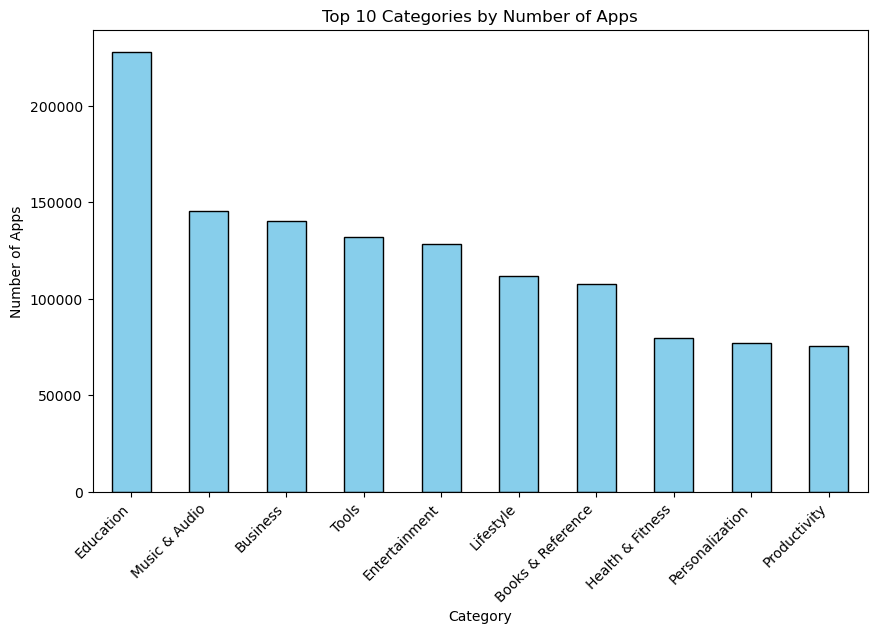

In [147]:
#total app number
total_apps = len(df)
print(f'\nThe number of apps is equal to : {total_apps}')

#category
cat = df['category'].value_counts().head(10)
print(f"\nThe number of apps by category : {cat}")

#plot
plt.figure(figsize=(10,6))
cat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.title("Top 10 Categories by Number of Apps")
plt.xticks(rotation=45, ha='right')  
plt.show()


The dataset contains a total of 2,177,943 apps.

Among them, the Education category represents the largest share with nearly 228,000 apps, followed by Music & Audio (145k), Business (140k), Tools (132k), and Entertainment (129k).
This indicates that Education is a highly represented category on the Play Store, making it a key area for deeper analysis in the context of Xpertbot.


II - Free vs Paid apps

The distribution of the Free and paid apps is the following : 
app_status
Free    2134252
Paid      43691
Name: count, dtype: int64

The precentage of the Free and paid apps is the following :
app_status
Free    97.993933
Paid     2.006067
Name: proportion, dtype: float64


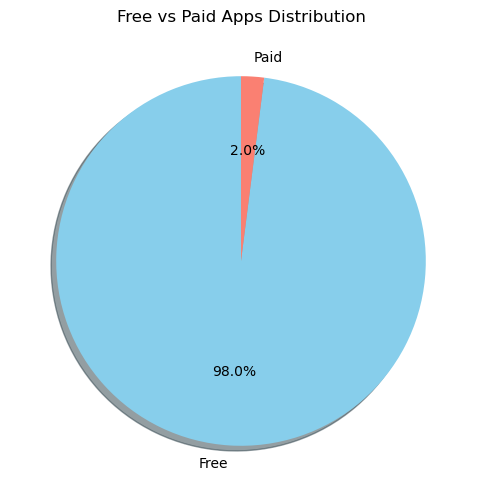

In [148]:
# Free vs paid app distribution
counts = df['app_status'].map({1: 'Free', 0: 'Paid'}).value_counts()
free_paid_percent = df['app_status'].map({1: 'Free', 0: 'Paid'}).value_counts(normalize=True) * 100
print(f"The distribution of the Free and paid apps is the following : ")
print(counts)
print(f"\nThe precentage of the Free and paid apps is the following :")
print(free_paid_percent)

#bar chart 
plt.figure(figsize=(6,6))
plt.pie(counts, 
        labels=counts.index,  # now shows 'Free' and 'Paid'
        autopct='%1.1f%%',  
        colors=['skyblue', 'salmon'], 
        startangle=90, 
        shadow=True)
plt.title("Free vs Paid Apps Distribution")
plt.show()

The vast majority of apps on the Play Store are free (≈98%), while only about 2% are paid.  
This highlights that the market is largely dominated by free apps, with monetization often relying on in-app purchases or ads rather than upfront payment.


III - Ratings distribution

Number of unrated apps: 1008810
rating
1.0      690
1.1      226
1.2      518
1.3      563
1.4      975
1.5     1130
1.6     1592
1.7     1873
1.8     2880
1.9     2503
2.0     3649
2.1     3684
2.2     4778
2.3     5224
2.4     6123
2.5     7255
2.6     8800
2.7     8803
2.8    11680
2.9    10977
3.0    18334
3.1    14828
3.2    22265
3.3    22596
3.4    28639
3.5    32739
3.6    34330
3.7    41590
3.8    51916
3.9    53105
4.0    63138
4.1    64794
4.2    81496
4.3    77099
4.4    79931
4.5    71327
4.6    73195
4.7    58512
4.8    57877
4.9    42320
5.0    95179
Name: count, dtype: int64


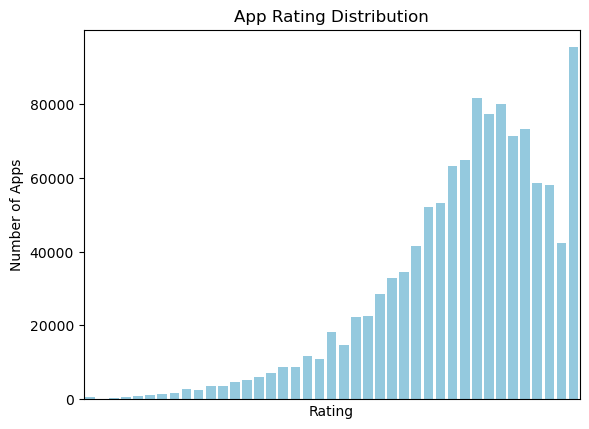

In [149]:
#Unrated applications:
unrated_count = (df['rating'] == 0.0).sum()
print("Number of unrated apps:", unrated_count)

# frequency of the ratings by app
rating_counts = df.loc[df['rating']!= 0, 'rating'].value_counts().sort_index()
print(rating_counts)


# App rating distribution

sns.barplot(x=rating_counts.index, y=rating_counts.values, color="skyblue")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.title("App Rating Distribution")
plt.xticks([]) 
plt.show()

*Most apps cluster around 3-4 stars, while unrated apps are common.*

IV - Installs distribution

category
Video Players & Editors    1794695.0
Racing                     1214132.0
Communication              1190185.0
Action                      885593.0
Photography                 748200.0
Name: avg_installs, dtype: float64
                     app_name                 category  avg_installs  \
2155096  Google Play services                    Tools  1.102881e+10   
881403                YouTube  Video Players & Editors  7.383115e+09   
1773294                Google                    Tools  7.077124e+09   

         app_status  
2155096           1  
881403            1  
1773294           1  
                                app_name      category  avg_installs  \
2141064               dofty.Example1_dev         Tools           1.0   
292938              Simple Ball Runner 2        Arcade           1.0   
1256625  Wallpapers Graphic Animals 2020  Art & Design           1.0   

         app_status  
2141064           1  
292938            1  
1256625           1  


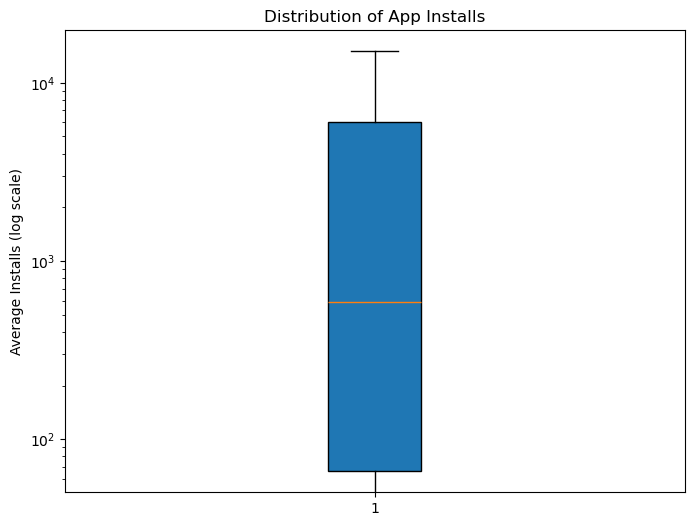

In [150]:
#top 5 categories installed - avg installs per category
category_installs = df.groupby('category')['avg_installs'].mean().sort_values(ascending=False).head()
category_installs = category_installs.round(0)
print(category_installs)

# top 5 highest installation
top5 = df.sort_values(by='avg_installs', ascending=False).head(3)
print(top5[['app_name', 'category', 'avg_installs', 'app_status']])

# top 5 less installation
df_nonzero = df[df['avg_installs'] != 0]
less = df_nonzero.sort_values(by='avg_installs', ascending = True).head(3)
print(less[['app_name', 'category', 'avg_installs','app_status']])


# Distribution of App installs

plt.figure(figsize=(8,6))
plt.boxplot(df['avg_installs'], vert=True, patch_artist=True, showfliers=False)  # optionally hide outliers
plt.yscale('log')  # log scale for better visualization
plt.ylabel("Average Installs (log scale)")
plt.title("Distribution of App Installs")
plt.show()



 Average installs by category:
  The `Video Players & Editors` category has the highest average installs (1.79 million), followed by `Racing` (1.21 million), `Communication` (1.19 million), `Action` (0.89 million), and `Photography` (0.75 million). This suggests that entertainment and communication apps tend to attract more users on average.

 Top installed apps:
  Some individual apps have extremely high average installs, e.g., `Google Play Services` (11 billion), `YouTube` (7.38 billion), and `Google` (7.08 billion). These are essential system or media apps with widespread global usage.

 Low-install apps: 
  On the other end, some apps like `dofty.Example1_dev`, `Simple Ball Runner 2`, and `Wallpapers Graphic Animals 2020` have only 1 average install, indicating very low engagement or newly published apps.

Overall, this highlights the large variation in app popularity, from a single install to billions of installs.


V - Play Store recommendations

In [152]:
#the nb of apps recommended by play store = 1
app_recommended = df['play_store_recommend'].value_counts()
print(app_recommended)

# percentage of these values 
percent_app = df['play_store_recommend'].value_counts(normalize = True) * 100
print(percent_app)

# categories that get the most recommendation
recom_cat = df.groupby('category')['play_store_recommend'].sum()
recom_cat = recom_cat.sort_values(ascending = False).head(5)
print(recom_cat)

play_store_recommend
0    2177106
1        837
Name: count, dtype: int64
play_store_recommend
0    99.961569
1     0.038431
Name: proportion, dtype: float64
category
Role Playing    79
Action          76
Puzzle          66
Simulation      55
Casual          44
Name: play_store_recommend, dtype: int32


### Interpretation of Play Store Recommendation Data

Recommendation counts:  
  Out of all apps, the vast majority (`2,177,106` apps, ~99.96%) are not recommended, while only a tiny fraction (`837` apps, ~0.04%) are recommended**. This indicates that Play Store recommendations are very selective.

 Top categories among recommended apps:
  The categories with the highest number of recommended apps are:
  - `Role Playing` (79 apps)
  - `Action` (76 apps)
  - `Puzzle` (66 apps)
  - `Simulation` (55 apps)
  - `Casual` (44 apps)  

  This suggests that games, especially role-playing and action games, are more likely to receive Play Store recommendations compared to other app types.


---



# **Deep Dive: Education Apps**

*This analysis will now shift towards education-related applications on the Play Store.
By exploring their presence, performance, and characteristics, we can gain a clearer understanding of the education app market, identify trends, and highlight opportunities relevant to our work.*

I - How many Education apps are there? 

*Education is one of the largest categories on the Play Store, with thousands of applications covering language learning, e-learning platforms, and children’s educational games*

In [153]:
Education_count = df[df['category'] == 'Education'].shape[0]
print(f"The number of education apps is : {Education_count}")

The number of education apps is : 227982


II - How well do Education apps perform? (Installs & Ratings)

*On average, Education apps achieve respectable install counts and maintain strong ratings, suggesting steady demand and user satisfaction*

In [154]:

education_app = df[df['category'] == 'Education']
avg_installs = education_app['avg_installs'].mean().round(0)

subset_nonzero = education_app[education_app['rating'] != 0]
#avg_rating = education_app['rating'].mean().round(2)
avg_rating_by_education = subset_nonzero.groupby('category')['rating'].mean().round(2)

print(f"The average installs of the education apps is : {avg_installs}")
print(f"\nThe average rating of the education apps is : ")
print(avg_rating_by_education)


The average installs of the education apps is : 33801.0

The average rating of the education apps is : 
category
Education    4.19
Name: rating, dtype: float64


III - Are they free or paid?



The distribution of the Free and paid education apps is the following : 
app_status
Free    221665
Paid      6317
Name: count, dtype: int64

The precentage of the Free and paid education apps is the following :
app_status
Free    97.229167
Paid     2.770833
Name: proportion, dtype: float64 %


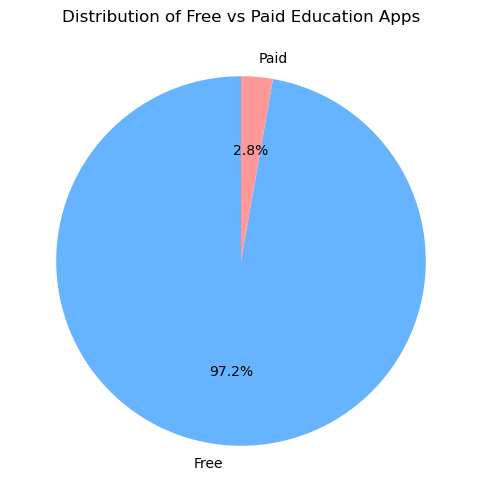

In [155]:
free_app = education_app['app_status'].map({1: 'Free', 0: 'Paid'}).value_counts()
free_app_percentage = education_app['app_status'].map({1: 'Free', 0: 'Paid'}).value_counts(normalize=True) * 100
print(f"The distribution of the Free and paid education apps is the following : ")
print(free_app)
print(f"\nThe precentage of the Free and paid education apps is the following :")
print(f"{free_app_percentage} %")

# INSERT A PIE CHART OR A BAR CHART 

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(free_app, labels=['Free','Paid'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title("Distribution of Free vs Paid Education Apps")
plt.show()


This shows that the Education category on the Play Store is overwhelmingly dominated by free apps, suggesting that most educational content is accessible without payment.

IV - How much do they cost on average?

*Among paid Education apps, the average price remains relatively low, indicating accessibility is a key factor for this category.*

In [156]:
# Filter only paid Education apps
paid_education_apps = education_app[education_app['Price'] > 0]

# Compute the average price among paid apps
avg_paid_price = paid_education_apps['Price'].mean().round(3)
print(f'The average price of paid Education apps is ${avg_paid_price}')

The average price of paid Education apps is $6.122


*Insight:  Although the vast majority of Education apps are free, the paid apps generally cost around $6, reflecting the premium features or specialized content they provide compared to free apps.*

V - Release trends over time

"The release of Education apps has grown steadily over the past decade, with noticeable peaks during the expansion of e-learning platforms."

released_year
2010      146
2011      849
2012     2208
2013     3950
2014     6439
2015    10332
2016    16033
2017    28529
2018    36941
2019    47710
2020    57541
2021    17304
Name: count, dtype: int64


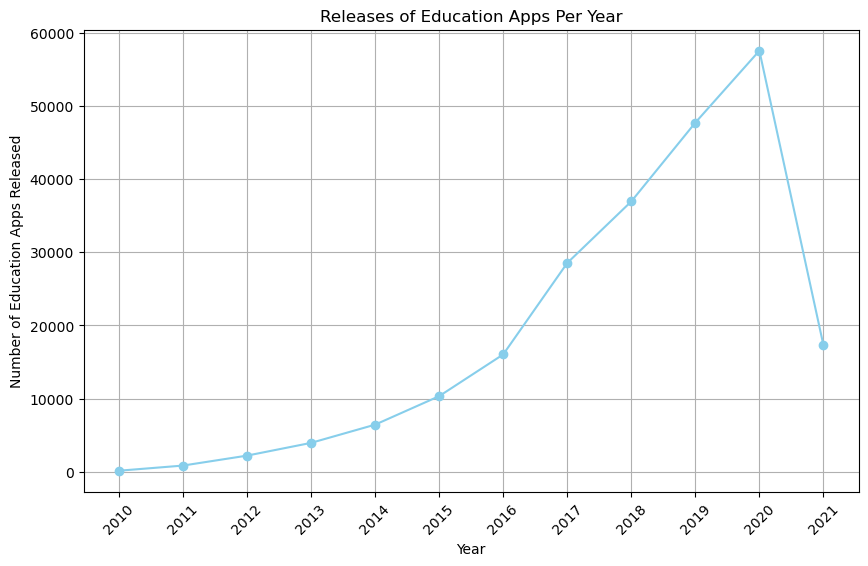

In [157]:

education_app = df[df['category'] == 'Education']
released_edu_app_byy = education_app['released_year'].value_counts().sort_index()
print(released_edu_app_byy)

#PLOT
plt.figure(figsize=(10,6))
plt.plot(released_edu_app_byy.index, released_edu_app_byy.values, marker='o', color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Education Apps Released")
plt.title("Releases of Education Apps Per Year")
plt.xticks(released_edu_app_byy.index, rotation=45)  # rotate years if needed
plt.grid(True)
plt.show()


 *The overall trend shows a growing interest in educational apps over the past decade, with a surge particularly between 2015 and 2020, highlighting the expansion of mobile learning during that period.*

 

VI - Top developers in Education

"A small number of developers dominate the category, each publishing multiple apps, while many others contribute with a smaller number of niche products."

developer_name
Subsplash Inc             2332
Apptegy                   1721
TTMA Apps                 1141
Education A19-Media        835
Education Galaxy Media     771
NUPUIT                     767
Education Nick Media       723
Education Media            713
Appeal Qualiserve          689
Education Thor Media       667
Name: count, dtype: int64


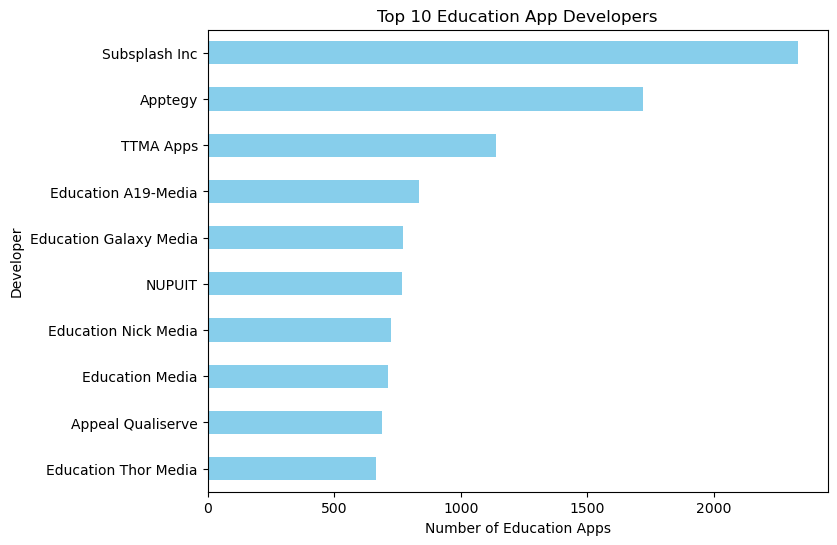

In [158]:
#top 10 education app developers by nb of apps

education_app = df[df['category'] == 'Education']
dev_by_app = education_app['developer_name'].value_counts().head(10)
print(dev_by_app)


dev_by_app.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.xlabel("Number of Education Apps")
plt.ylabel("Developer")
plt.title("Top 10 Education App Developers")
plt.gca().invert_yaxis()  # largest on top
plt.show()


This indicates that a small number of developers dominate the Education category, likely due to app portfolios targeting schools, e-learning platforms, or content libraries. The distribution is highly skewed, with a few prolific developers producing hundreds or thousands of apps, while most other developers release only a handful.

VII - In-App Purchases (IAP) and Recommendations

"Interestingly, many Education apps include in-app purchases. While this monetization strategy is common, our analysis explores whether it impacts Play Store recommendations."

In [159]:
# % of app with and without IAP
app_with_iap = df['in_app_purchases_flag'].value_counts()
print(f"The number of apps with purchases features is equal to : ")
print(app_with_iap)

p_app_with_iap = df['in_app_purchases_flag'].value_counts(normalize = True) * 100
print(f"\nThe precentage of apps with purchases features is equal to : ")
print(p_app_with_iap)

# Are Education apps more or less likely to use IAP?
education_app = df[df['category'] == 'Education']
use_iap = education_app['in_app_purchases_flag'].value_counts()
print(f"\nThe number of education apps with purchases features is equal to : ")
print(use_iap)

percentage_use_iap = education_app['in_app_purchases_flag'].value_counts(normalize = True) *100
print(f"\nThe precentage of education apps with purchases features is equal to : ")
print(f'percentage: { percentage_use_iap}')


#In Education apps, does having IAP hurt or help chances of being recommended?

## the education app that have recommended and has an IAP
education_app = df[df['category'] == 'Education']
edu_iap = education_app.groupby('play_store_recommend')['in_app_purchases_flag'].sum()
print(f'\nThe number of education apps that have recommendations from play store and have IAP : ')
print(edu_iap)


The number of apps with purchases features is equal to : 
in_app_purchases_flag
0    1991365
1     186578
Name: count, dtype: int64

The precentage of apps with purchases features is equal to : 
in_app_purchases_flag
0    91.433293
1     8.566707
Name: proportion, dtype: float64

The number of education apps with purchases features is equal to : 
in_app_purchases_flag
0    212855
1     15127
Name: count, dtype: int64

The precentage of education apps with purchases features is equal to : 
percentage: in_app_purchases_flag
0    93.364827
1     6.635173
Name: proportion, dtype: float64

The number of education apps that have recommendations from play store and have IAP : 
play_store_recommend
0    15096
1       31
Name: in_app_purchases_flag, dtype: int32


*Education apps tend to rely less on in-app monetization compared to the overall app market.*

*Education apps are largely free and recommendation on the Play Store is mostly given to apps without IAP, possibly reflecting the preference for fully accessible educational content.*

**Conclusion**

Education apps form a significant and competitive category in the Play Store. They are predominantly free, well-rated, and widely adopted by users, with steady growth over time. The dominance of a few major developers, alongside a long tail of smaller contributors, reflects both opportunities and challenges in this market. For Xpertbot, these insights highlight the importance of maintaining strong ratings, leveraging a freemium model, and ensuring consistent updates to remain competitive in the Education space.


---

## **Comparative Insights Across Categories**


Beyond Education apps, it is important to compare categories more broadly.

By looking at ratings, installs, pricing, and monetization features across different types of apps, we can position Education apps within the larger Play Store ecosystem.

I. Average Ratings by Category

Categories like Education and Music tend to achieve higher average ratings compared to Tools or Business, reflecting stronger user satisfaction in entertainment and learning-related apps.

In [160]:
#Average rating by category (Education vs Tools vs games)

categories_of_interest = ['Education', 'Music & Audio', 'Tools', 'Business']
subset = df[df['category'].isin(categories_of_interest)]

subset_nonzero = subset[subset['rating'] != 0]

avg_rating_by_category = subset_nonzero.groupby('category')['rating'].mean().round(2)
avg_rating_by_category = avg_rating_by_category.sort_values(ascending = False)
print(avg_rating_by_category)

category
Music & Audio    4.29
Education        4.19
Business         4.05
Tools            3.89
Name: rating, dtype: float64


Education apps are generally well-rated, with an average of **4.19**, slightly lower than Music & Audio apps but higher than Business and Tools apps. This suggests that users are generally satisfied with Education apps, while Tools apps receive relatively lower ratings, possibly due to functionality or usability issues.

II - Average Installs by Category

While Education apps are well-rated, categories such as Games or Social consistently attract significantly higher installs, highlighting differences between popularity and perceived quality.

In [161]:
# average installs by category

avg_installs_by_category = df.groupby('category')['avg_installs'].mean().round(0)
avg_installs_by_category = avg_installs_by_category.sort_values(ascending = False)
print(avg_installs_by_category)


category
Video Players & Editors    1794695.0
Racing                     1214132.0
Communication              1190185.0
Action                      885593.0
Photography                 748200.0
Strategy                    708757.0
Simulation                  682781.0
Role Playing                666663.0
Tools                       648805.0
Music                       574184.0
Social                      569617.0
Weather                     509165.0
Productivity                474612.0
Casual                      462471.0
Arcade                      363984.0
Casino                      354788.0
Board                       349944.0
Adventure                   332264.0
Educational                 310218.0
Puzzle                      276355.0
Word                        272779.0
Card                        247785.0
Sports                      214813.0
Travel & Local              211334.0
Comics                      182162.0
Entertainment               181690.0
News & Magazines            1

*Popularity (measured by average installs) is strongly concentrated in entertainment, gaming, and communication apps, while more specialized, educational, or utility apps tend to attract smaller user bases. This reflects user preferences on mobile platforms, with casual and widely appealing content dominating downloads.*

III - Are Education apps more/less likely to use IAP compared to Music & Audio?

category
Education        6.635173
Music & Audio    2.903467
Name: in_app_purchases_flag, dtype: float64


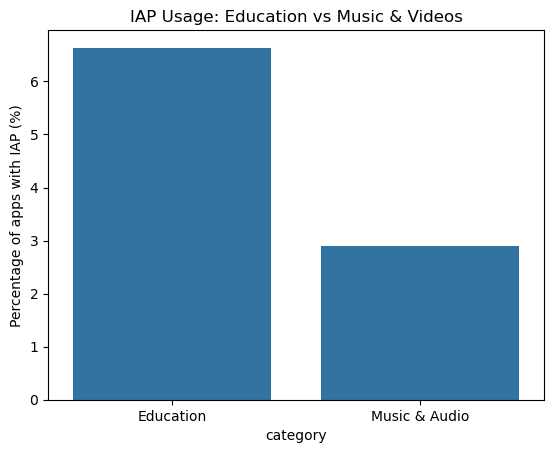

In [162]:
subset = ('Music & Audio' , 'Education')
iap_group = df[df['category'].isin(subset)].groupby('category')['in_app_purchases_flag'].mean() *100
print(iap_group)

# visualse

sns.barplot(x=iap_group.index, y=iap_group.values)
plt.ylabel("Percentage of apps with IAP (%)")
plt.title("IAP Usage: Education vs Music & Videos")
plt.show()


*Education apps are more likely to include IAP compared to Music & Audio apps. This could be because some educational apps offer premium content, extra features, or subscription models, while Music & Audio apps may rely more on ad-supported or free content.*

IV - Free vs Paid Across Categories

A pivot analysis shows that most categories are dominated by free apps, though categories such as Business or Productivity feature a larger share of paid applications.

In [163]:

# Create a pivot table: index = category, columns = Free/Paid, values = count
free_paid_per_category = df.pivot_table(index='category', 
                                        columns='app_status', 
                                        aggfunc='size', 
                                        fill_value=0)

# Rename columns for readability
free_paid_per_category.columns = ['Paid', 'Free']  # assuming 0 = Paid, 1 = Free

print(free_paid_per_category.head())

                 Paid   Free
category                    
Action            587  25839
Adventure         968  21347
Arcade            728  48454
Art & Design      168  16704
Auto & Vehicles   276  17471


 *Free apps overwhelmingly dominate all categories, often outnumbering paid apps by a factor of 20–70. Paid apps are a small fraction, typically offering additional features, premium content, or ad-free experiences. This highlights the prevalence of free apps across mobile categories, with monetization strategies often relying on in-app purchases or advertising rather than upfront payment.*



V - In-App Purchases & Recommendations

Heatmaps reveal that apps offering in-app purchases tend to have higher average installs and are more likely to be recommended by the Play Store, especially in categories like Games and Education.

                       in_app_purchases_flag  play_store_recommend  \
in_app_purchases_flag               1.000000              0.046480   
play_store_recommend                0.046480              1.000000   
avg_installs                        0.014953              0.063293   

                       avg_installs  
in_app_purchases_flag      0.014953  
play_store_recommend       0.063293  
avg_installs               1.000000  


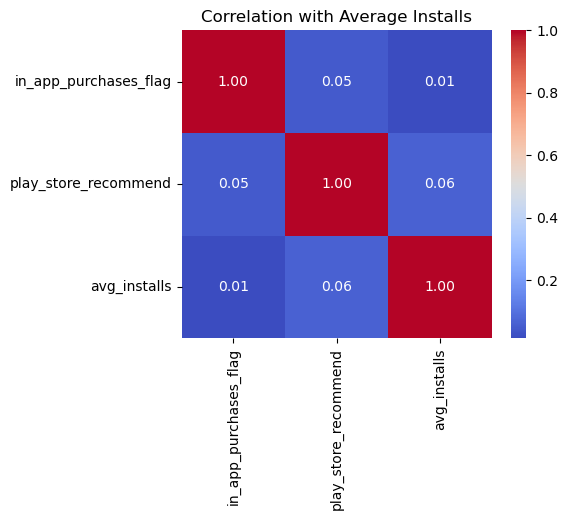

In [164]:
subset = df[['in_app_purchases_flag', 'play_store_recommend', 'avg_installs']]
corr_matrix = subset.corr()
print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation with Average Installs")
plt.show()


*Contrary to common expectations, offering in-app purchases or being recommended does not strongly affect average installs. This highlights that other factors, such as app quality, category, or marketing, may play a bigger role in driving installs.*

---

## Overall Conclusion and Business Implications

The analysis shows that the vast majority of apps in the dataset follow a free or freemium model, with only a very small proportion being fully paid. This is consistent with real-world trends in the education sector: "Khan Academy" is an example of a platform that offers all content for free, relying on donations and partnerships instead of direct user payments. In contrast, "Duolingo" follows a freemium model, where the core learning experience is free but additional features (e.g., ad-free experience, offline access) are monetized through subscriptions and in-app purchases. This comparison suggests that offering free access maximizes adoption, while introducing a premium tier provides a path for financial sustainability—an insight that could be valuable when thinking about future strategies for XpertBot.

*Key Recommandations for XpertBot:*
- dopt a freemium model: Focus on free access to core features, with optional premium upgrades (e.g., advanced lessons, certificates, or ad-free versions).
- Focus on quality over quantity: Competing with large developers is difficult in terms of volume. XpertBot should prioritize specialized, high-quality educational content to stand out.  
- Leverage recommendations: Since Play Store recommendations are rare and favor apps without IAP, optimizing user experience, ratings, and accessibility is critical for visibility.  
- Improve engagement: User satisfaction is already high for Education apps, but XpertBot can differentiate with interactive features, gamification, or AI-driven personalization to retain users.  

### Final takeaway

For XpertBot, success in the Education app market lies in balancing accessibility (free content) with sustainable monetization (freemium/IAP), investing in quality and user satisfaction, and targeting niches where the company can differentiate from mass developers.  